In [53]:
import fitsio
import numpy as np
import matplotlib.pyplot as plt
import glob
import os.path
%matplotlib inline

In [90]:
fiberassign_root = "/global/cscratch1/sd/forero/DR5FiberAssign/fiberassign/tileresults"
fiberassign_tilefiles = glob.glob(fiberassign_root+"/tile*.fits")
print(len(fiberassign_tilefiles))
print(fiberassign_tilefiles[0])

10667
/global/cscratch1/sd/forero/DR5FiberAssign/fiberassign/tileresults/tile_13200.fits


In [69]:
output_root = "/global/cscratch1/sd/forero/gfa_test/"
gfa_files = glob.glob(os.path.join(output_root, "gfa_targets_*.fits"))
print(len(gfa_files))

7


In [70]:
gfa_tile_id = {}
for gfa_file in gfa_files:
    f = gfa_file.split('/')[-1]
    fileid = f.split("_")[-1]
    fileid = fileid[0:5]
    gfa_tile_id[fileid] = gfa_file

In [71]:
fa_tile_id = {}
for fa_file in fiberassign_tilefiles:
    f = fa_file.split('/')[-1]
    fileid = f.split("_")[-1]
    fileid = fileid[0:5]
    fa_tile_id[fileid] = fa_file

In [98]:
for gfa_id in gfa_tile_id.keys():
    if gfa_id in fa_tile_id.keys():
        print(gfa_id)
        
        gfa_data = fitsio.read(gfa_tile_id[gfa_id])
        fiber_data = fitsio.read(fa_tile_id[gfa_id], ext=1)
        potential_data = fitsio.read(fa_tile_id[gfa_id], ext=2)

        tileout = os.path.join(output_root, 'tile_{}.fits'.format(gfa_id))
        fitsio.write(tileout, fiber_data, extname='FIBERASSIGN')
        fitsio.write(tileout, potential_data, extname='POTENTIAL')
        fitsio.write(tileout, gfa_data, extname='GFA')
        #print(gfa_id, fa_tile_id[gfa_id], gfa_tile_id[gfa_id])

00284
00290
00286
00288
00287
00285
00289


29641


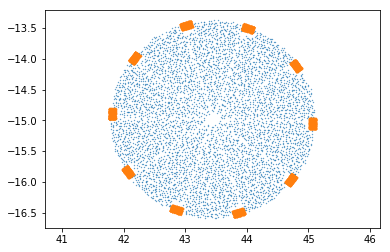

In [99]:
ii = fiber_data['TARGETID']!=-1
print(len(potential_data))
plt.scatter(fiber_data['RA'][ii], fiber_data['DEC'][ii], s =0.1)
plt.scatter(gfa_data['RA'], gfa_data['DEC'], s =0.1)
a=plt.axis('equal')

In [100]:
fa = fitsio.read(tileout, ext='FIBERASSIGN')
gfa = fitsio.read(tileout, ext='GFA')
pot = fitsio.read(tileout, ext='POTENTIAL')

OSError: File not found: '/global/cscratch1/sd/forero/gfa_test/tile_00289.fits'

In [101]:
pot

array([(21991277985795236,), (21991277985795106,), (21991277985794889,),
       ..., (21991289725653283,), (21991289725652980,),
       (21991289725652748,)], 
      dtype=[('POTENTIALTARGETID', '>i8')])

In [102]:
gfa

array([(42.95096559317478, -13.539682690537454, 0.25029563903808594),
       (42.95108038609631, -13.538036513735522, 0.1833827942609787),
       (42.951349336982915, -13.53678161289608, 0.07659043371677399), ...,
       (44.12032055076013, -13.484469754754544, 0.18396040797233582),
       (44.11880439669622, -13.485577378640524, 2.0677967071533203),
       (44.11999428093925, -13.487151405835382, 0.30456849932670593)], 
      dtype=[('RA', '>f8'), ('DEC', '>f8'), ('FLUX_R', '>f4')])

In [103]:
fa

array([ (0, 95, 18, 3400, 21991277985794894, 262148, 0, 0, 43.44764983324702, -14.255117488201758, -1.8182088136672974, -177.7584991455078, b'0433m142'),
       (1, 62, 12, 3200, 21991277989986842, 65537, 0, 0, 43.63233641517783, -14.355477131072064, -45.618316650390625, -152.87576293945312, b'0436m142'),
       (2, 102, 2, 3000, 21991277989990501, 131074, 0, 0, 43.65092271450353, -14.198023968510896, -50.2506103515625, -192.13999938964844, b'0436m142'),
       ...,
       (4997, 9226, 7, 3400, 21991278002572106, 262148, 0, 0, 44.30106782415202, -14.211274500706148, -207.30528259277344, -190.51492309570312, b'0444m142'),
       (4998, 9261, 9, 3200, 21991278002573778, 65537, 0, 0, 44.35215816558569, -14.127745868154053, -220.50148010253906, -211.99362182617188, b'0444m142'),
       (4999, 9458, 8, 3400, 21991289725653182, 262148, 0, 0, 44.02094429475671, -13.65788035806814, -142.05226135253906, -332.481689453125, b'0441m137')], 
      dtype=[('FIBER', '>i4'), ('LOCATION', '>i4'), ('NUM